### Problem Statement

A multinational retail company decides to embark on a campaign called 'Operation Increase Sales and Profit' (OISP) which focuses on increasing the sales of the company and maximising profit.

Before the management team of the company can take any actionable decision with regards to the campaign, they want to draw the necessary insight from their 'sitting data'.

As their Data Scientist,you are presented with their four year daily sales records (superstore data.csv).

### Task
<h5>Analyze the given data and advise management on what to do to increase sales and profit as intended in the campaign.</h5>

<h5>Kindly outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the     necessary questions and providing answers based on the data.</h5>

<h5>Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a         report on your findings and your advice.</h5>

<h5>Develop a machine learning model that can predict profit on an order.</h5>

Good Luck !

Hints on Data preparation and exploration 
    <ol>Load the data.</ol>
    <ol>Inspect the data</ol>
    <ol>Check for missing values</ol>
    <ol>Check the data of each column</ol>
    <ol>Check the different categories in the categorical variables</ol>
    <ol>Take a view of the data</ol>
    <ol>Take the descriptive statistics for the numerical variables</ol>
    <ol>Check the distribution of the variables</ol>
    <ol>Feature Engineering</ol>
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
dframe = pd.read_csv(filepath_or_buffer=r'C://Users//user//PycharmProjects//supermarket//superstore_data.csv', encoding='ISO-8859-1')
dframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01/01/2011,01/06/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,01/01/2011,01/08/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,01/01/2011,01/05/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,01/01/2011,01/05/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,01/01/2011,01/08/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
pd.set_option('display.max_columns', 24)
dframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,01/01/2011,01/06/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,01/01/2011,01/08/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,01/01/2011,01/05/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,01/01/2011,01/05/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,01/01/2011,01/08/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
# checking the various features in the dataset
cols = dframe.columns
cols

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
# viewing the unique values in each feature of my dataframe
for col in cols:
    print(col)
    print(dframe[col].unique())
    print()

Row ID
[42433 22253 48883 ...  8857  6852 36388]

Order ID
['AG-2011-2040' 'IN-2011-47883' 'HU-2011-1220' ... 'MX-2014-108574'
 'MO-2014-2560' 'CA-2014-156720']

Order Date
['01/01/2011' '02/01/2011' '03/01/2011' ... '31-12-2012' '31-12-2013'
 '31-12-2014']

Ship Date
['01/06/2011' '01/08/2011' '01/05/2011' ... '01/05/2015' '01/06/2015'
 '01/07/2015']

Ship Mode
['Standard Class' 'Second Class' 'First Class' 'Same Day']

Customer ID
['TB-11280' 'JH-15985' 'AT-735' ... 'KM-6225' 'NM-8520' 'BD-1500']

Customer Name
['Toby Braunhardt' 'Joseph Holt' 'Annie Thurman' 'Eugene Moren'
 "Patrick O'Donnell" 'Liz Carlisle' 'David Kendrick' 'Stephanie Phelps'
 'Dave Hallsten' "Patrick O'Brill" 'Gene Hale' 'Ralph Ritter'
 'Ionia McGrath' 'Tom Prescott' 'Todd Sumrall' 'Ruben Dartt'
 'Tom Boeckenhauer' 'Vicky Freymann' 'Katherine Hughes' 'Dave Brooks'
 'Giulietta Weimer' 'Shahid Collister' 'Bryan Spruell' 'Chris McAfee'
 'Randy Ferguson' 'Logan Haushalter' 'Lori Olson' 'Ed Ludwig'
 'Brian DeCherney' '

In [6]:
# checking the various data types of each variable
dframe.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [7]:
# converting Order date and Ship date to datetime
dates = ['Order Date', 'Ship Date']
for date in dates:
    dframe[date] = pd.to_datetime(dframe[date], errors='coerce')
    dframe[date+'_Year'] = dframe[date].dt.year
    dframe[date+'_Month'] = dframe[date].dt.month
    dframe[date+'_Day'] = dframe[date].dt.day

C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2014' in DD/MM/YYYY format. Provide format or specify in

In [8]:
dframe.head(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Date_Year,Order Date_Month,Order Date_Day,Ship Date_Year,Ship Date_Month,Ship Date_Day
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,...,408.300,2,0.00,106.1400,35.46,Medium,2011,1,1,2011,1,6
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,...,120.366,3,0.10,36.0360,9.72,Medium,2011,1,1,2011,1,8
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,...,66.120,4,0.00,29.6400,8.17,High,2011,1,1,2011,1,5
3,11731,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,...,44.865,3,0.50,-26.0550,4.82,High,2011,1,1,2011,1,5
4,22255,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,...,113.670,5,0.10,37.7700,4.70,Medium,2011,1,1,2011,1,8
5,22254,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,...,55.242,2,0.10,15.3420,1.80,Medium,2011,1,1,2011,1,8
6,21613,IN-2011-30733,2011-02-01,2011-02-03,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,Bangladesh,NaN,...,285.780,2,0.00,71.4000,57.30,Critical,2011,2,1,2011,2,3
7,34662,CA-2011-115161,2011-02-01,2011-02-03,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,United States,92691.0,...,290.666,2,0.15,3.4196,54.64,High,2011,2,1,2011,2,3
8,44508,AO-2011-1390,2011-02-01,2011-02-04,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,Angola,NaN,...,206.400,1,0.00,92.8800,53.08,Critical,2011,2,1,2011,2,4
9,23688,ID-2011-56493,2011-02-01,2011-02-03,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,China,NaN,...,162.720,3,0.00,68.3100,44.36,Critical,2011,2,1,2011,2,3


In [9]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            51290 non-null  int64         
 1   Order ID          51290 non-null  object        
 2   Order Date        51290 non-null  datetime64[ns]
 3   Ship Date         51290 non-null  datetime64[ns]
 4   Ship Mode         51290 non-null  object        
 5   Customer ID       51290 non-null  object        
 6   Customer Name     51290 non-null  object        
 7   Segment           51290 non-null  object        
 8   City              51290 non-null  object        
 9   State             51290 non-null  object        
 10  Country           51290 non-null  object        
 11  Postal Code       9994 non-null   float64       
 12  Market            51290 non-null  object        
 13  Region            51290 non-null  object        
 14  Product ID        5129

In [10]:
dframe.isnull().sum()

Row ID                  0
Order ID                0
Order Date              0
Ship Date               0
Ship Mode               0
Customer ID             0
Customer Name           0
Segment                 0
City                    0
State                   0
Country                 0
Postal Code         41296
Market                  0
Region                  0
Product ID              0
Category                0
Sub-Category            0
Product Name            0
Sales                   0
Quantity                0
Discount                0
Profit                  0
Shipping Cost           0
Order Priority          0
Order Date_Year         0
Order Date_Month        0
Order Date_Day          0
Ship Date_Year          0
Ship Date_Month         0
Ship Date_Day           0
dtype: int64

In [11]:
dframe['Ship Date_Year'].unique()

array([2011, 2012, 2013, 2014, 2015], dtype=int64)

In [12]:
dframe.drop(['Ship Date', 'Order Date'], axis=1, inplace=True)

In [13]:
dframe.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Order Date_Year', 'Order Date_Month',
       'Order Date_Day', 'Ship Date_Year', 'Ship Date_Month', 'Ship Date_Day'],
      dtype='object')

In [14]:
# postal code contains a lot of null values, over 41,000. It wouldnt have any impact on my analysis so I will drop that column
# together with Row and Order ID. 
dframe.drop(['Postal Code', 'Row ID', 'Order ID'], axis=1, inplace=True)

In [15]:
pd.set_option('display.max_columns', None)
dframe.head()

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Date_Year,Order Date_Month,Order Date_Day,Ship Date_Year,Ship Date_Month,Ship Date_Day
0,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,1,1,2011,1,6
1,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,1,1,2011,1,8
2,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,1,1,2011,1,5
3,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,1,1,2011,1,5
4,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,1,1,2011,1,8


### Which country are we recording most and least orders from respectively?

In [16]:
# Finding the countries we record more orders from

order = dframe['Country'].value_counts()
order = order.reset_index()
order.columns = ["Country", "No. of Orders"]
order

,Country,No. of Orders
0,United States,9994
1,Australia,2837
2,France,2827
3,Mexico,2644
4,Germany,2065
...,...,...
142,Eritrea,2
143,Chad,2
144,Swaziland,2
145,South Sudan,2


#### United States happen to be the country with most orders and Barhain happen to be the country with least orders.

In [17]:
# Finding out top 20 countries with most orders
order.head(20)

,Country,No. of Orders
0,United States,9994
1,Australia,2837
2,France,2827
3,Mexico,2644
4,Germany,2065
5,China,1880
6,United Kingdom,1633
7,Brazil,1599
8,India,1555
9,Indonesia,1390


### Find out the average sales and average profits recorded from the countries

In [18]:
# Finding out average sales and profit recorded in each country
country = dframe.groupby('Country')[['Sales', 'Profit']].mean()
country

,Sales,Profit
Country,,
Afghanistan,394.060364,99.278182
Albania,243.007500,44.332500
Algeria,184.140765,46.461735
Angola,209.459016,53.237459
Argentina,147.466111,-47.932812
...,...,...
Venezuela,137.050668,-57.849023
Vietnam,248.302639,-7.057474
Yemen,82.190400,-123.548600


### Which top 10 countries record the most sales averagely ? attach average profits to it

In [19]:
# Finding out top 10 countries with most sales recorded averagely
country.sort_values(by='Sales', ascending=False).head(10)

,Sales,Profit
Country,,
Lesotho,1118.665000,233.035000
Montenegro,1001.092500,321.690000
Chad,658.515000,45.000000
Taiwan,546.259286,129.900000
South Sudan,522.810000,93.180000
Slovenia,489.980000,196.680000
Bangladesh,480.101043,119.207914
Republic of the Congo,452.205000,46.790000
Uruguay,404.689333,70.389333


#### Lesotho, Montenegro, Chad, Taiwan .... Japan are the top 10 countries which record most average sales 

### Which top 10 countries record the least sales averagely ? attach average profits to it

In [20]:
# Finding out top 10 countries with least sales recorded averagely
country.sort_values(by='Sales', ascending=False).tail(10)

,Sales,Profit
Country,,
Tajikistan,80.928000,-87.622000
Turkey,78.743068,-71.442113
Nigeria,60.055638,-89.227313
United Arab Emirates,53.151429,-74.061429
Macedonia,52.410000,10.845000
Armenia,52.250000,23.030000
Equatorial Guinea,50.170000,14.820000
Zimbabwe,47.063812,-67.859813
Kazakhstan,45.598455,-70.296000


<AxesSubplot:xlabel='Quantity', ylabel='Discount'>

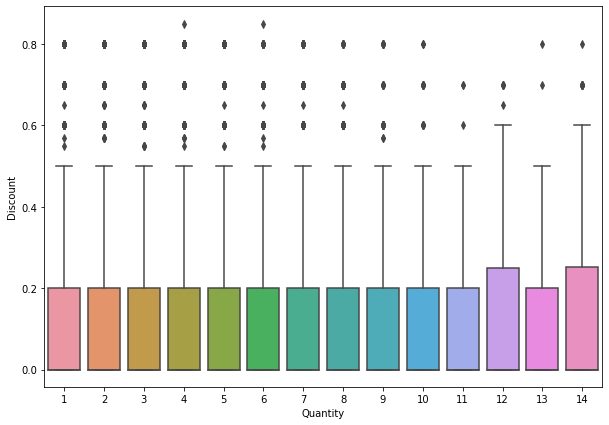

In [21]:
# Finding out the discount distribution associated to quantity on each order
plt.figure(figsize=(10,7))
sns.boxplot(x='Quantity', y='Discount', data=dframe)

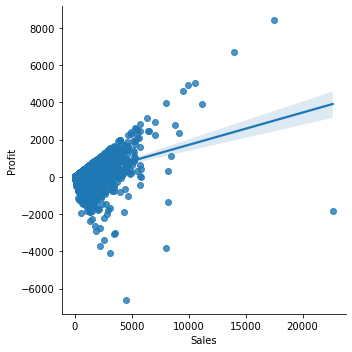

In [22]:
# Finding out relationship between sales and profit 
sns.lmplot(x='Sales', y='Profit', data=dframe)

### Find the total sales recorded per market and visualize 

In [23]:
# Finding out total sales per market in the year
sales_per_market = dframe.groupby('Market')['Sales'].sum().reset_index()
sales_per_market.columns = ['Market', 'Total Sales']
print(sales_per_market)
print()
max = sales_per_market.sort_values(by='Total Sales', ascending=False)
print("The Market with most sales in the year is :")
print(max.head(1))

   Market   Total Sales
0    APAC  3.585744e+06
1  Africa  7.837732e+05
2  Canada  6.692817e+04
3    EMEA  8.061613e+05
4      EU  2.938089e+06
5   LATAM  2.164605e+06
6      US  2.297201e+06

The Market with most sales in the year is :
  Market  Total Sales
0   APAC  3585744.129


#### APAC market records the most sales whiles US market records the least sales 

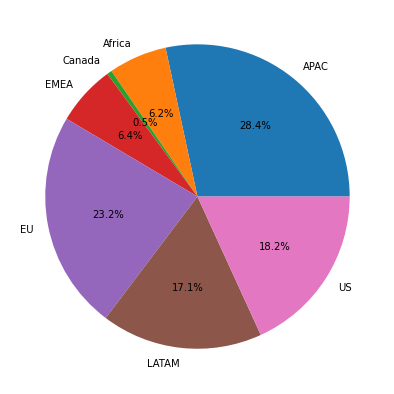

In [24]:
plt.figure(figsize=(12,7))
plt.pie(sales_per_market['Total Sales'], labels=sales_per_market['Market'], autopct='%1.1f%%')
plt.show()

In [25]:
# Finding out average sales per market in the year
sales_per_market_avg = dframe.groupby('Market')['Sales'].mean().reset_index()
sales_per_market_avg.columns = ['Market', 'Avg. Sales']
sales_per_market_avg.sort_values(by='Avg. Sales', ascending=False)

,Market,Avg. Sales
0,APAC,325.917481
4,EU,293.808906
6,US,229.858001
5,LATAM,210.278334
2,Canada,174.292109
1,Africa,170.868370
3,EMEA,160.302508


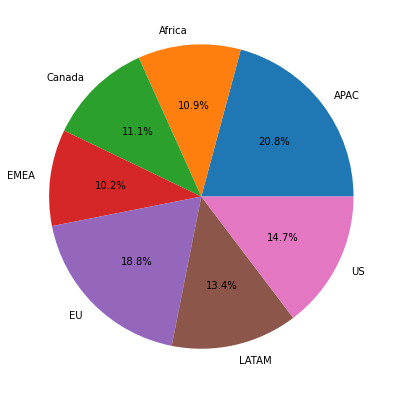

In [26]:
plt.figure(figsize=(12,7))
plt.pie(sales_per_market_avg['Avg. Sales'], labels=sales_per_market_avg['Market'], autopct='%1.1f%%')
plt.show()

In [27]:
dframe.head(3)

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Date_Year,Order Date_Month,Order Date_Day,Ship Date_Year,Ship Date_Month,Ship Date_Day
0,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,1,1,2011,1,6
1,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,1,1,2011,1,8
2,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,1,1,2011,1,5


In [28]:
# Adding a new column as unit price to contain values for the sales/quantity per order
dframe['Unit Price'] = dframe['Sales'] / dframe['Quantity']
dframe.head(10)

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Date_Year,Order Date_Month,Order Date_Day,Ship Date_Year,Ship Date_Month,Ship Date_Day,Unit Price
0,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium,2011,1,1,2011,1,6,204.150
1,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium,2011,1,1,2011,1,8,40.122
2,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High,2011,1,1,2011,1,5,16.530
3,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High,2011,1,1,2011,1,5,14.955
4,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium,2011,1,1,2011,1,8,22.734
5,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium,2011,1,1,2011,1,8,27.621
6,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,Bangladesh,APAC,Central Asia,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical,2011,2,1,2011,2,3,142.890
7,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,United States,US,West,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High,2011,2,1,2011,2,3,145.333
8,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,Angola,Africa,Africa,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical,2011,2,1,2011,2,4,206.400
9,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,China,APAC,North Asia,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical,2011,2,1,2011,2,3,54.240


### FInd out the top 10 most ordered products

In [29]:
# Finding out the top 10 most  prodcts ordered
most_prod = dframe.groupby('Product Name')['Quantity'].sum().reset_index()
most_prod.columns = ["Product Name", 'Quantity']
most_prod.sort_values(by='Quantity', ascending=False).head(10)

,Product Name,Quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


The company needs to make provisions for these in demand products at all times. Once a customer realises shortage in the product and they get it else where they wont come back. 

### In which countries are the top 10 in demand products ordered from?

In [30]:
# Finding the countries with the top 10 most products ordered
country = dframe.groupby(['Product Name', 'Country'])['Quantity'].sum().reset_index()
country.sort_values(by='Quantity', ascending=False).head(10)

,Product Name,Country,Quantity
28614,Staples,United States,876
18111,KI Adjustable-Height Table,United States,74
3676,Avery Non-Stick Binders,United States,71
29786,Storex Dura Pro Binders,United States,71
13256,GBC Premium Transparent Covers with Diagonal L...,United States,67
27131,"Situations Contoured Folding Chairs, 4/Set",United States,64
8348,Chromcraft Round Conference Tables,United States,61
11028,Eldon Wave Desk Accessories,United States,61
13329,"Global Wood Trimmed Manager's Task Chair, Khaki",United States,59
31419,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,United States,59


United States happen to be the one, we'll find out for all countries the top 10 in demand products and present to management

### Which top 10 products generate more profits to the company?

In [31]:
# find out top 10 most products that generate more profit to company
most_profit = dframe.groupby('Product Name')['Profit'].sum().reset_index()
most_profit.columns = ["Product Name", 'Profit']
most_profit.sort_values(by='Profit', ascending=False).head(10)

,Product Name,Profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
2501,"Nokia Smart Phone, Full Size",9938.1955
971,"Cisco Smart Phone, with Caller ID",9786.6408
2502,"Nokia Smart Phone, with Caller ID",9465.3257
589,"Belkin Router, USB",8955.0180


These details I believe will help the company maximize profits and increase sales since there will be more production of the goods and make sure there aren't shortages in any of the markets

In [32]:
# Finding the countries with the top 10 most products that generate more profit
country_prof = dframe.groupby(['Product Name', 'Country'])['Profit'].sum().reset_index()
country_prof.sort_values(by='Profit', ascending=False).head(10)

,Product Name,Country,Profit
7666,Canon imageCLASS 2200 Advanced Copier,United States,25199.9280
12715,Fellowes PB500 Electric Punch Plastic Comb Bin...,United States,7753.0390
15544,Hewlett Packard LaserJet 3310 Copier,United States,6983.8836
16738,"Hoover Stove, Red",Italy,5968.6200
7557,Canon PC1060 Personal Laser Copier,United States,4570.9347
20964,"Nokia Smart Phone, Full Size",United Kingdom,4560.7500
14537,"Hamilton Beach Stove, Silver",Spain,4540.1400
8682,"Cisco Smart Phone, Full Size",Mexico,4471.7200
14083,HP Designjet T520 Inkjet Large Format Printer ...,United States,4094.9766
24202,"SAFCO Executive Leather Armchair, Black",France,4075.9200


In [33]:
dframe.columns

Index(['Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Order Date_Year',
       'Order Date_Month', 'Order Date_Day', 'Ship Date_Year',
       'Ship Date_Month', 'Ship Date_Day', 'Unit Price'],
      dtype='object')

### Providing descriptive and statistical analytics for countries specifically

In [34]:
# a function that takes in a country name as parameter and returns statistical analytical details for that country for top 10 most products ordered
def country_key_info_sales(country_name):
    if  (dframe['Country'] == country_name).any():
        avg_sales = dframe.groupby('Product Name')['Sales'].mean()
        total_sales = dframe.groupby('Product Name')['Sales'].sum()
        min_sale = dframe.groupby('Product Name')['Sales'].min()
        max_sale = dframe.groupby('Product Name')['Sales'].max()
        order = dframe.groupby(['Product Name'])['Quantity'].sum()
        print('Average Sales for top 10 ordered products in '+country_name+ ' are')
        print(avg_sales.sort_values(ascending=False).head(10))
        print()
        print('Total Sales for top 10 ordered products in '+country_name+ ' are')
        print(total_sales.sort_values(ascending=False).head(10))
        print()
        print('Minimum Sales for top 10 ordered products in '+country_name+ ' is')
        print(min_sale.sort_values(ascending=False).head(10))
        print()
        print('Maximum Sales for top 10 ordered product in '+country_name+ ' is')
        print(max_sale.sort_values(ascending=False).head(10))
        print()
        print("Most ordered products in "+country_name+ ' are')
        print(order.sort_values(ascending=False).head(20))
        print()
        print("Least ordered products in "+country_name+ ' are')
        print(order.sort_values().head(20))
    else:
        pass

### What is  the variation in Sales, the most ordered products and least ordered products in the Ghana?

In [35]:
country_key_info_sales('Ghana')

Average Sales for top 10 ordered products in Ghana are
Product Name
Cisco TelePresence System EX90 Videoconferencing Unit                    22638.480000
Canon imageCLASS 2200 Advanced Copier                                    12319.964800
Cubify CubeX 3D Printer Triple Head Print                                 7999.980000
3D Systems Cube Printer, 2nd Generation, Magenta                          7149.945000
HP Designjet T520 Inkjet Large Format Printer - 24" Color                 6124.965000
High Speed Automatic Electric Letter Opener                               5676.770667
Ibico EPK-21 Electric Binding System                                      5291.972000
Lexmark MX611dhe Monochrome Laser Printer                                 4207.475250
Chromcraft Conference Table, Fully Assembled                              4021.044000
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier     3991.980000
Name: Sales, dtype: float64

Total Sales for top 10 ordered products in 

### What is  the variation in Profits in the United States?

In [36]:
# a function that takes in a country name as parameter and returns statistical analytical details for that country for top 10 most products ordered
def country_key_info_profit(country_name):
    if  (dframe['Country'] == country_name).any():
        avg_Profit = dframe.groupby('Product Name')['Profit'].mean()
        total_Profit = dframe.groupby('Product Name')['Profit'].sum()
        min_Profit = dframe.groupby('Product Name')['Profit'].min()
        max_Profit = dframe.groupby('Product Name')['Profit'].max()
        print('Average Profit for top 10 ordered products in '+country_name+ ' is')
        print(avg_Profit.sort_values(ascending=False).head(10))
        print()
        print('Total Profit for top 10 ordered products in '+country_name+ ' is')
        print(total_Profit.sort_values(ascending=False).head(10))
        print()
        print('Minimum Profit for top 10 ordered products in '+country_name+ ' is')
        print(min_Profit.sort_values(ascending=False).head(10))
        print()
        print('Maximum Profit for top 10 ordered product in '+country_name+ ' is')
        print(max_Profit.sort_values(ascending=False).head(10))
    else:
        pass

In [37]:
country_key_info_profit('United States')

Average Profit for top 10 ordered products in United States is
Product Name
Canon imageCLASS 2200 Advanced Copier                                    5039.985600
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    1995.990000
Ativa V4110MDD Micro-Cut Shredder                                        1886.473050
3D Systems Cube Printer, 2nd Generation, Magenta                         1858.985700
Zebra ZM400 Thermal Label Printer                                        1671.768000
Hewlett-Packard Desktjet 6988DT Refurbished Printer                      1668.205000
Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer            1459.200000
HP Designjet T520 Inkjet Large Format Printer - 24" Color                1364.992200
Canon PC1060 Personal Laser Copier                                       1142.733675
Ibico EPK-21 Electric Binding System                                     1115.094100
Name: Profit, dtype: float64

Total Profit for top 10 ordered products in 

### What is the average sales and profits recorded for each month?

In [38]:
# Find out average profits and average sales along the Order Date month in the year
vis = dframe.groupby("Order Date_Month")[['Sales', 'Profit']].mean().reset_index()
vis.columns = ['Order Date_Month', 'Avg. Sales', 'Avg. Profit']
vis

,Order Date_Month,Avg. Sales,Avg. Profit
0,1,259.766707,28.293722
1,2,250.802297,32.717804
2,3,253.871809,31.000831
3,4,228.512009,24.047639
4,5,241.262967,27.891589
5,6,238.176093,27.589461
6,7,236.696727,24.658905
7,8,254.791880,29.904315
8,9,240.565709,28.525219
9,10,260.174696,35.026583


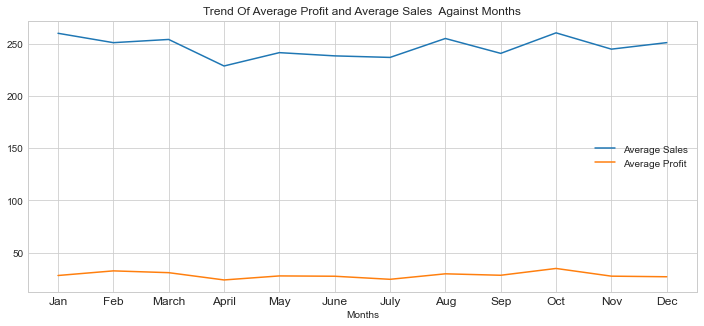

In [39]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 5))
plt.style.use("seaborn-whitegrid")
plt.plot(months, vis["Avg. Sales"], label="Average Sales")
plt.plot(months, vis["Avg. Profit"], label="Average Profit")
plt.title("Trend Of Average Profit and Average Sales  Against Months")
plt.xlabel("Months")
plt.xticks( fontsize=12)
plt.legend()
plt.show()

In [40]:
# Find out the 20 products with most quantity ordered across the various months and the ones least purchased

most_prods = dframe.groupby(['Product Name', 'Order Date_Month'])['Quantity'].sum().reset_index()
print("Most Ordered by Quantity")
print(most_prods.sort_values(by='Quantity', ascending=False).head(20))
print()
print("Least Ordered by Quantity")
print(most_prods.sort_values(by='Quantity', ascending=False).tail(20))

Most Ordered by Quantity
                             Product Name  Order Date_Month  Quantity
22126                             Staples                11       121
22127                             Staples                12       115
22124                             Staples                 9       113
22125                             Staples                10        73
22118                             Staples                 3        68
22121                             Staples                 6        67
22117                             Staples                 2        66
22123                             Staples                 8        65
22119                             Staples                 4        64
7965        Eldon File Cart, Single Width                 6        53
22120                             Staples                 5        53
7968        Eldon File Cart, Single Width                 9        52
6058            Cardinal Index Tab, Clear                10      

In [41]:
dframe.dtypes

Ship Mode            object
Customer ID          object
Customer Name        object
Segment              object
City                 object
State                object
Country              object
Market               object
Region               object
Product ID           object
Category             object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Discount            float64
Profit              float64
Shipping Cost       float64
Order Priority       object
Order Date_Year       int64
Order Date_Month      int64
Order Date_Day        int64
Ship Date_Year        int64
Ship Date_Month       int64
Ship Date_Day         int64
Unit Price          float64
dtype: object

### Developing a machine learning model that will predict the profit for an order 

In [42]:
for col in dframe.columns:
    print(col)
    print(dframe[col].unique())
    print()

Ship Mode
['Standard Class' 'Second Class' 'First Class' 'Same Day']

Customer ID
['TB-11280' 'JH-15985' 'AT-735' ... 'KM-6225' 'NM-8520' 'BD-1500']

Customer Name
['Toby Braunhardt' 'Joseph Holt' 'Annie Thurman' 'Eugene Moren'
 "Patrick O'Donnell" 'Liz Carlisle' 'David Kendrick' 'Stephanie Phelps'
 'Dave Hallsten' "Patrick O'Brill" 'Gene Hale' 'Ralph Ritter'
 'Ionia McGrath' 'Tom Prescott' 'Todd Sumrall' 'Ruben Dartt'
 'Tom Boeckenhauer' 'Vicky Freymann' 'Katherine Hughes' 'Dave Brooks'
 'Giulietta Weimer' 'Shahid Collister' 'Bryan Spruell' 'Chris McAfee'
 'Randy Ferguson' 'Logan Haushalter' 'Lori Olson' 'Ed Ludwig'
 'Brian DeCherney' 'Jeremy Farry' 'Edward Hooks' 'Hallie Redmond'
 'Aaron Smayling' 'Benjamin Patterson' 'Rachel Payne' 'Jennifer Braxton'
 'Pete Armstrong' 'Victoria Pisteka' 'Lynn Smith' 'Kunst Miller'
 'Katharine Harms' 'Adam Bellavance' 'Matt Hagelstein' 'Dianna Wilson'
 'Liz Thompson' 'Mike Caudle' 'Yana Sorensen' 'Muhammed MacIntyre'
 'Nick Zandusky' 'Monica Federle'

In [43]:
# finding the correlation of numerical features with my target variable Profit
dframe.corr()['Profit']

Sales               0.484918
Quantity            0.104365
Discount           -0.316490
Profit              1.000000
Shipping Cost       0.354441
Order Date_Year     0.002626
Order Date_Month    0.000140
Order Date_Day     -0.002413
Ship Date_Year      0.002391
Ship Date_Month     0.000636
Ship Date_Day       0.002242
Unit Price          0.418647
Name: Profit, dtype: float64

In [44]:
categorical = []
for col in dframe.columns:
    if dframe[col].dtype == "O":
        categorical.append(col)
categorical

['Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Order Priority']

In [45]:
numerical = []
for col in dframe.columns:
    if dframe[col].dtype != "O":
        numerical.append(col)
numerical

['Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Date_Year',
 'Order Date_Month',
 'Order Date_Day',
 'Ship Date_Year',
 'Ship Date_Month',
 'Ship Date_Day',
 'Unit Price']

In [46]:
# applying mean encoding on categorical features in the dataframe for machine learning

means = dframe.groupby('Customer ID')['Profit'].mean().sort_values().index
means

Index(['KD-6270', 'DM-3345', 'BG-1035', 'CS-12505', 'MT-8070', 'JC-6105',
       'JK-6090', 'JF-5190', 'SS-10875', 'TC-11535',
       ...
       'KM-6720', 'CR-2580', 'HL-15040', 'DJ-3510', 'MD-7860', 'GZ-4545',
       'TT-11070', 'MG-8145', 'HM-4980', 'BW-1065'],
      dtype='object', name='Customer ID', length=1590)

In [47]:
dict = {value:i for i, value in enumerate(means,0)}
dframe['Customer ID'] = dframe['Customer ID'].map(dict)

In [48]:
dframe['Customer ID']

0         506
1         276
2         768
3        1271
4         276
         ... 
51285    1178
51286     516
51287     497
51288     270
51289     924
Name: Customer ID, Length: 51290, dtype: int64

In [49]:
def mean_encoding(df, col_name, target_col):
    means = df.groupby(col_name)[target_col].mean().sort_values().index
    dict = {value:i for i, value in enumerate(means,0)}
    df[col_name] = df[col_name].map(dict)

In [50]:
mean_encoding(dframe, 'City', 'Profit')

In [51]:
mean_encoding(dframe, 'Product ID', 'Profit')

In [52]:
print(dframe['Order Priority'].unique())
print()
print(dframe['Segment'].unique())

['Medium' 'High' 'Critical' 'Low']

['Consumer' 'Home Office' 'Corporate']


In [53]:
# applying label/ordinal encoding on the Order Priority and Segment categorical features

priority = {'Low':0, 'Medium':1,  'High':2, 'Critical':3}
dframe['Order Priority'] = dframe['Order Priority'].map(priority)

In [54]:
segment = {'Consumer':1,  'Home Office':2, 'Corporate':3}
dframe['Segment'] = dframe['Segment'].map(segment)

In [55]:
dframe['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [56]:
# Applying one hot feature encoding on Ship Mode categorical feature
 
for value in dframe['Ship Mode'].unique():
    dframe['Ship Mode_'+value] = dframe['Ship Mode'].apply(lambda x: 1 if x==value else 0)

In [57]:
dframe.head(5)

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Date_Year,Order Date_Month,Order Date_Day,Ship Date_Year,Ship Date_Month,Ship Date_Day,Unit Price,Ship Mode_Standard Class,Ship Mode_Second Class,Ship Mode_First Class,Ship Mode_Same Day
0,Standard Class,506,Toby Braunhardt,1,1740,Constantine,Algeria,Africa,Africa,8154,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,1,2011,1,1,2011,1,6,204.150,1,0,0,0
1,Standard Class,276,Joseph Holt,1,2210,New South Wales,Australia,APAC,Oceania,7959,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,1,2011,1,1,2011,1,8,40.122,1,0,0,0
2,Second Class,768,Annie Thurman,1,1972,Budapest,Hungary,EMEA,EMEA,4702,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,2,2011,1,1,2011,1,5,16.530,0,1,0,0
3,Second Class,1271,Eugene Moren,2,145,Stockholm,Sweden,EU,North,3009,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,2,2011,1,1,2011,1,5,14.955,0,1,0,0
4,Standard Class,276,Joseph Holt,1,2210,New South Wales,Australia,APAC,Oceania,7352,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,1,2011,1,1,2011,1,8,22.734,1,0,0,0


In [58]:
dframe.isnull().sum()

Ship Mode                   0
Customer ID                 0
Customer Name               0
Segment                     0
City                        0
State                       0
Country                     0
Market                      0
Region                      0
Product ID                  0
Category                    0
Sub-Category                0
Product Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Shipping Cost               0
Order Priority              0
Order Date_Year             0
Order Date_Month            0
Order Date_Day              0
Ship Date_Year              0
Ship Date_Month             0
Ship Date_Day               0
Unit Price                  0
Ship Mode_Standard Class    0
Ship Mode_Second Class      0
Ship Mode_First Class       0
Ship Mode_Same Day          0
dtype: int64

In [59]:
# checking for outliers in my data 
def outliers(df, col):
    sns.displot(df[col])

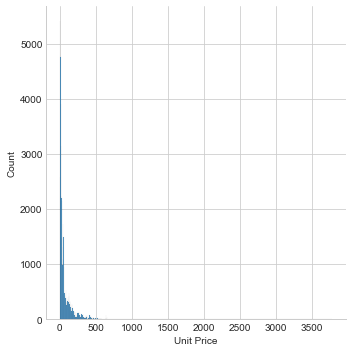

In [60]:
outliers(dframe, 'Unit Price')

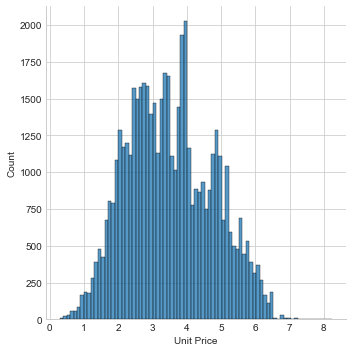

In [61]:
# Handling outliers in Unit Price feature

dframe['Unit Price'] = np.log1p(dframe['Unit Price'])
outliers(dframe, 'Unit Price')

In [62]:
# Selecting important features for machine learning model

dframe.drop(['Category', 'Sub-Category', 'Product Name', 'Customer Name', 'State', 'Country', 'Market', 'Ship Mode', 'Region', 'Order Date_Year', 'Ship Date_Year'], axis=1, inplace=True)

In [63]:
dframe.head(5)

,Customer ID,Segment,City,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Date_Month,Order Date_Day,Ship Date_Month,Ship Date_Day,Unit Price,Ship Mode_Standard Class,Ship Mode_Second Class,Ship Mode_First Class,Ship Mode_Same Day
0,506,1,1740,8154,408.300,2,0.0,106.140,35.46,1,1,1,1,6,5.323741,1,0,0,0
1,276,1,2210,7959,120.366,3,0.1,36.036,9.72,1,1,1,1,8,3.716543,1,0,0,0
2,768,1,1972,4702,66.120,4,0.0,29.640,8.17,2,1,1,1,5,2.863914,0,1,0,0
3,1271,2,145,3009,44.865,3,0.5,-26.055,4.82,2,1,1,1,5,2.769772,0,1,0,0
4,276,1,2210,7352,113.670,5,0.1,37.770,4.70,1,1,1,1,8,3.166909,1,0,0,0


In [64]:
y = dframe['Profit']
x = dframe.drop("Profit", axis=1)

In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [66]:
feature_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [67]:
feature_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True])

In [68]:
features = x.columns
features_selected = features[feature_model.get_support()]
features_selected

Index(['Customer ID', 'Segment', 'City', 'Product ID', 'Sales', 'Quantity',
       'Discount', 'Shipping Cost', 'Order Priority', 'Order Date_Month',
       'Order Date_Day', 'Ship Date_Month', 'Ship Date_Day', 'Unit Price',
       'Ship Mode_First Class', 'Ship Mode_Same Day'],
      dtype='object')

In [69]:
x = x[features_selected]

In [70]:
# Apply machine learning model
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
model = RandomForestRegressor()

In [74]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
y_pred = model.predict(X_test)
y_pred

array([   3.795188 ,   47.8100944, -220.6567772, ...,   35.894045 ,
       -523.546374 ,   41.9183614])

In [76]:
print(X_test, y_pred)

       Customer ID  Segment  City  Product ID    Sales  Quantity  Discount  \
23541         1442        1  2483        3642   27.960         1       0.0   
23517          988        2  2477        7045  336.060         2       0.0   
76             532        3   741         516  496.584         6       0.4   
29009          831        1  2865        5065   33.020         2       0.0   
10615          989        1  1700        8219  466.320         3       0.2   
...            ...      ...   ...         ...      ...       ...       ...   
13980         1282        3  2759        8798  171.968         2       0.2   
24238          593        1  2986        4298  191.130         1       0.0   
31381         1114        2  2879        5211  236.160         6       0.0   
40417          189        3    83        8760  410.616         8       0.7   
10075          436        1  3531        7005  254.160         1       0.0   

       Shipping Cost  Order Priority  Order Date_Month  Order D

In [77]:
# Evaluating the model's accuracy
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [78]:
def evaluate(ml_model):
    r2_score = metrics.r2_score(y_test, y_pred)
    print("r2 score is {}".format(r2_score))
    print("MSE is {}".format(metrics.mean_squared_error(y_test, y_pred)))
    print("RMSE is {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print("MAPE is {}".format((mean_absolute_percentage_error(y_test, y_pred) * 100)))
    plt.figure(figsize=(10,7))
    sns.displot(y_test - y_pred)

r2 score is 0.8508518268976945
MSE is 5885.634324407255
RMSE is 76.71788790371679
MAPE is 1.0226156436247064e+17


<Figure size 720x504 with 0 Axes>

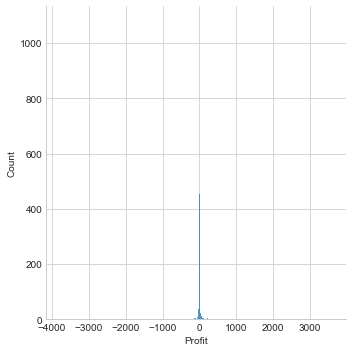

In [79]:
evaluate(model)

### from the plot, majority of the error between the desired output(y_test) and predicted output(y_pred) is 0. This means our model predicts majority of the test data right.

In [80]:
# Cross Validating the model 
from sklearn.model_selection import RandomizedSearchCV

In [81]:
reg_model = RandomForestRegressor()

In [82]:
n_estimators = [int(x) for x in np.linspace(950,1300,4)]

max_features = ["auto", "sqrt"]

max_depth = [int(x) for x in np.linspace(3,28,4)]

min_samples_split = [5,10,15,80]

In [83]:
param_grid = {
    'n_estimators':n_estimators,
    'max_features': max_features,   
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [84]:
cross_val = RandomizedSearchCV(reg_model, param_distributions=param_grid, cv=3, verbose=2, n_jobs=1)

In [85]:
cross_val.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=11, max_features=auto, min_samples_split=5, n_estimators=950; total time= 2.4min
[CV] END max_depth=11, max_features=auto, min_samples_split=5, n_estimators=950; total time= 2.4min
[CV] END max_depth=11, max_features=auto, min_samples_split=5, n_estimators=950; total time= 2.4min
[CV] END max_depth=11, max_features=sqrt, min_samples_split=10, n_estimators=1066; total time=  45.3s
[CV] END max_depth=11, max_features=sqrt, min_samples_split=10, n_estimators=1066; total time=  45.1s
[CV] END max_depth=11, max_features=sqrt, min_samples_split=10, n_estimators=1066; total time=  45.0s
[CV] END max_depth=3, max_features=auto, min_samples_split=15, n_estimators=1300; total time=  57.6s
[CV] END max_depth=3, max_features=auto, min_samples_split=15, n_estimators=1300; total time=  56.4s
[CV] END max_depth=3, max_features=auto, min_samples_split=15, n_estimators=1300; total time=  56.4s
[CV] END max_depth=28, max_fea

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [3, 11, 19, 28],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 80],
                                        'n_estimators': [950, 1066, 1183,
                                                         1300]},
                   verbose=2)

In [86]:
cross_val.best_params_

{'n_estimators': 950,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 11}

In [87]:
y_pred2 = cross_val.predict(X_test)
metrics.r2_score(y_test, y_pred2)

0.8453525267008319